# Import libraries 

In [1]:
#imports
import scipy
import math as mt
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score

#cross validation
from sklearn.model_selection import train_test_split
from math import sqrt

# Import Dataset

In [2]:
#Importing dataset
wifi = pd.read_csv('./Datasets/trainingData.csv', header =0)
validate = pd.read_csv("./Datasets/validationData.csv", header = 0)

In [3]:
wifi.iloc[:, 0:520] = np.where(wifi.iloc[:, 0:520] <= 0,
         wifi.iloc[:, 0:520] + 105,
         wifi.iloc[:, 0:520] - 100)
validate.iloc[:, 0:520] = np.where(validate.iloc[:, 0:520] <= 0,
         validate.iloc[:, 0:520] + 105,
         validate.iloc[:, 0:520] - 100)


In [4]:
wifi["LONGITUDE"] = - wifi["LONGITUDE"]
validate["LONGITUDE"]= - validate["LONGITUDE"]

## Feature engineering

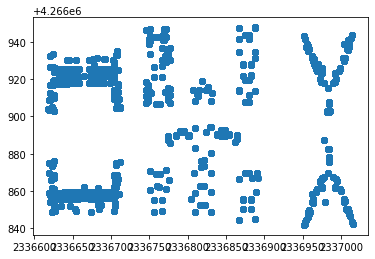

In [5]:
angle =np.arctan(wifi["LATITUDE"][0]/wifi["LONGITUDE"][0])
angle = angle/mt.pi
LONGITUDE = wifi["LONGITUDE"]*np.cos(angle) + wifi["LATITUDE"]*np.sin(angle)
LATITUDE = wifi["LATITUDE"]*np.cos(angle) - wifi["LONGITUDE"]*np.sin(angle)
plt.scatter(LONGITUDE,LATITUDE)
wifi["LONGITUDE"] = LONGITUDE
wifi["LATITUDE"] = LATITUDE
plt.show()

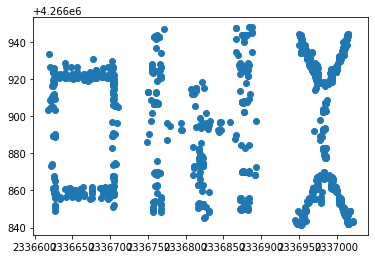

In [6]:
vlong = validate["LONGITUDE"]*np.cos(angle) +validate["LATITUDE"]*np.sin(angle)
vlat = validate["LATITUDE"]*np.cos(angle) - validate["LONGITUDE"]*np.sin(angle)
validate["LONGITUDE"] = vlong
validate["LATITUDE"] = vlat
plt.scatter(vlong,vlat)

## Cross validation

### Longitude

In [7]:
#features
X = wifi.iloc[:,0:520]
#dependent variable
y = wifi["BUILDINGID"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13955, 520), (5982, 520), (13955,), (5982,))

In [11]:
#Rf model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [12]:
scores = cross_val_score(estimator=forest, 
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy scores: [0.99785254 0.99856734 1.         0.997851   0.99856734 0.99713467
 0.99856734 0.99784792 0.9964132  0.99928264]
CV accuracy: 0.998 +/- 0.001


In [13]:
predictions = forest.predict(X_test)

In [14]:
cohen_kappa_score(y_test, predictions)

0.9963190491448343

## Test Set

In [ ]:
fig = px.scatter_3d(validate, x = 'LONGITUDE', y = 'LATITUDE', z = 'FLOOR', color = "BUILDINGID")
fig.show()

In [ ]:
vx = validate.iloc[:,0:520]
vy = validate["BUILDINGID"]

In [ ]:
vpreds = forest.predict(vx)

In [ ]:
print("RMSE:", mean_squared_error(vy, vpreds))
print("r^2:", r2_score(vy, vpreds))
print("MAE:", mean_absolute_error(vy, vpreds))

## Loop try

In [ ]:
def modeling(variable):
    X = wifi.iloc[:,1:520]
    y = variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
    forest.fit(X_train, y_train)

In [ ]:
dependent = [wifi["LONGITUDE"], wifi["LATITUDE"], wifi["FLOOR"]]
models = map(modeling, dependent)